# Stock Active Risk Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol1 = '^GSPC' #input
symbol2 = 'AMD' #input

In [3]:
market = yf.download(symbol1, start=start, end=end)['Adj Close']
stocks = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
market_returns = market.pct_change().dropna()
stocks_returns = stocks.pct_change().dropna()

In [5]:
def active_risk(stock_returns, market_returns):
    N = 14  
    ar = np.sqrt((sum((stock_returns - market_returns)**2)/(N-1)))
    return ar

Text(0, 0.5, 'Active Risk')

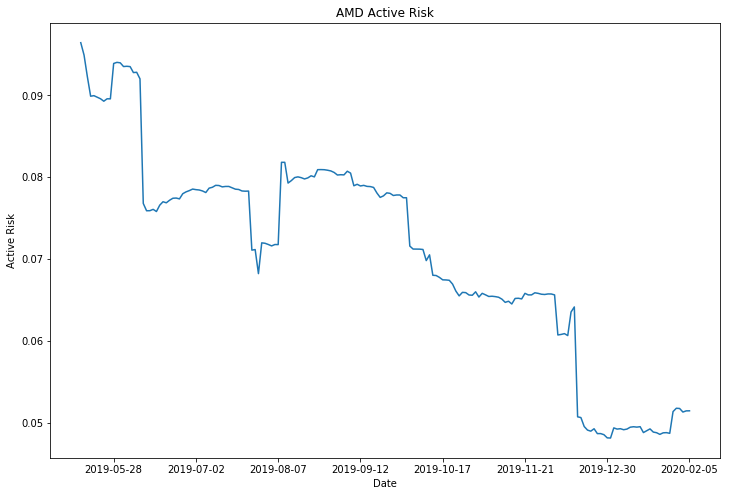

In [6]:
# Compute the running Active Risk
running = [active_risk(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Active Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol2 + ' Active Risk')
plt.xlabel('Date')
plt.ylabel('Active Risk')

In [7]:
stock_ar = active_risk(stocks_returns, market_returns)
stock_ar

0.15587056702303861

In [8]:
running = [active_risk(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[0.09642247417732748,
 0.09490680937231001,
 0.09228011026935604,
 0.08988425103269004,
 0.08994932651331626,
 0.08976348795102822,
 0.08957369147112465,
 0.08927107920170496,
 0.08956606417455906,
 0.08956258185010964,
 0.09388341032237593,
 0.09401887757123836,
 0.09396231747461573,
 0.09350744077037139,
 0.09354049753947141,
 0.09350120329515185,
 0.0927723819849101,
 0.09280567144782974,
 0.0920035803678545,
 0.0767793518845296,
 0.07588889416888145,
 0.07589668123489188,
 0.0760608136340825,
 0.07579565261740219,
 0.07656906325827612,
 0.07698921772377147,
 0.07686074319116411,
 0.07717579872448933,
 0.07741672039501714,
 0.07744123589395226,
 0.07733947997271841,
 0.07797085960549403,
 0.07819650184431166,
 0.07835052931737871,
 0.07853745307058492,
 0.07846842270331603,
 0.07842598084623874,
 0.07830812556948757,
 0.07811455153902297,
 0.07865015050356947,
 0.07875699501638109,
 0.07899391179152823,
 0.07897209346383226,
 0.07880695900333069,
 0.07885950166314427,
 0.07885933151